Eric Berger

Extrapolation Algorithm 

Abstract:
Suppose we are given n data points described by an unknown function, and we wish to approximate the value of the function at an unkown point. Essentially what all extrapolation algorithms do, is use known information to approximate the unknown. A common approach is to fit the points to a polynomial and evaluate that polynomial for points not in the data set. The algrorithm described below, attempts to equate a Taylor series to a Lagrange polynomial in an effort to gain insight into the unknown function. 

To begin, we'll start by using a method developed by Lagrange. This method assumes a polynomial of degree n-1, that passes through each known point exactly, and finds that polynomial using a system of linear equations. 

$$ points: (x_1,y_1),\;(x_2,y_2),...,\;(x_n,y_n) $$

$$ a_1 + a_2 x_1 + a_3 x_1^2 +...+ a_n x_{1}^{ n-1 } = y_1 $$
$$ a_1 + a_2 x_2 + a_3 x_2^2 +...+ a_n x_{2}^{ n-1 } = y_2 $$
$$ \vdots $$
$$ a_1 + a_2 x_n + a_3 x_n^2 +...+ a_n x_{n}^{ n-1 } = y_n $$

This of course, easily gereralizes into a linear system that can be solved in a straight forward manner. 

$$ 
\begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^{n-1} \\
1 & x_2 & x_2^2 & \dots & x_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots &  \vdots \\
1 & x_n & x_n^2 & \dots & x_n^{n-1} 
\end{bmatrix}  
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{bmatrix} 
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n 
\end{bmatrix}
$$

Now, we can simplify this system by only reading data points at uniform intervals. We difine a distance between each point, $ d $, and note that each x value is an integer multiple of $ d $, or $ id $. The matrix system then looks like, 

$$
\begin{bmatrix} 
1 & d & d^2 & \dots & d^{n-1} \\
1 & 2d & 4d^2 & \dots & (2d)^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & nd & (nd)^2 & \dots & (nd)^{n-1}
\end{bmatrix}
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{bmatrix} 
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n 
\end{bmatrix}
$$

The next step involves a systematic row reduction. We start at the last row, and subtract from it, the row directly above. This operation eliminates the bottom left element. Performing the same operation on the n-1 row, and then the n-2 row, and all the way to the second row, will clear the entire first column of the matrix. This operation can in fact be performed again, and again, on each column to create an upper triangular matrix. If one performs enough of these operations, while carefully keeping track of the y values, a pattern will emerge. 

$$
\begin{bmatrix}
M_{11} & M_{12} & \dots & M_{1n} & \vdots & B_1 \\
0 & M_{22} & \dots & M_{2n} & \vdots & B_2 \\
\vdots & \vdots & \ddots & \vdots & & \vdots \\
0 & 0 & \dots & M_{nn} & \vdots & B_n
\end{bmatrix}
$$

Where the elements are described by the following:

$$ B_{i} = \displaystyle\sum_{k=0}^{i-1} \binom{i-1}{k} (-1)^{i-k-1} y_{k+1} $$

$$ M_{ij} = \displaystyle\sum_{k=0}^{i-1} \binom{i-1}{k} (k+1)^{j-1} (-1)^{j-1} d^{j-1} $$

From here, it would be a simple matter to use back substitution and solve for each coefficient directly. Accordingly, this method defines each coefficient with a recursive relationship. 

$$ a_{i} = \frac{1}{M_{ij}} \left( B_{i} - \displaystyle\sum_{k=i+1}^{n} M_{ik} a_{k} \right) $$

What if, however, we wanted a non-recursive formula for each individual coefficient? The reasons for this might become clear later on. Like any other recursion, this is solved by plugging in several values, and realizing a pattern. As an example, let's take a look at $ a_1 $ for n = 4 data points. 

$$ \frac{B_1}{M_{11}} - \frac{M_{12}B_2}{M_{11}M_{22}} - \left( \frac{M_{12}M_{23}-M_{13}M_{22}}{M_{11}M_{22}M_{33}} \right) B_3 + \left( \frac{-M_{12}M_{23}M_{34}+M_{12}M_{24}M_{33}+M_{13}M_{34}M_{22}-M_{14}M_{22}M_{33}}{M_{11}M_{22}M_{33}M_{44}} \right) B_4 $$

Although a pattern might not be obvious from the above expression, performing the calculation for several values of n makes it easier to find. With each n increase, however, the expression expands factorially in length, for reasons that will be obvious shortly. Skipping to the punchline, the subscripts of the matrix elements in each numerator, can be generated by a remarkably simple swapping algorithm. Take the last numerator, for $ B_4 $, for example. We start with the first term on the left, and swap the column numbers from right to left. 

$$ 
\begin{matrix}
12 && 23 && 34 \\
&&& \times \\
12 && 24 && 33 \\
& \times \\
13 && 22 && 33 \\
\end{matrix}
\;\;\;\;\;\;\;\;\;
\begin{matrix}
12 && 23 && 34 \\
&&& \times \\
12 && 24 && 33 \\
\\
12 && 23 && 34 \\
& \times \\
13 && 22 && 34 \\
\end{matrix}
$$

Order matters here. In fact, what becomes apparent is, all the terms for each numerator form a complete set of all the decreasing, sequential swaps that can be performed, starting at the right-most number, ending at the left-most. It bears mentioning, that the interval between points, d, always cancels out, and therefore has no effect on the polynomial fit, or the respective coefficients. 

This process turns out to be a general algorithm for calculating isolated solutions from an upper triangle matrix, without any knowledge of the other solutions. It is, however, no more efficient than simply using back substitution. So why bother with it at all? To answer this, we'll have to return to the Lagrange method from above, and analyze one of its major limitations. 

At first, one might think that fitting an exact line to data points would provide the best extrapolation. This is in fact, not true. As the number of data points increases, so does the degree of the fitted polynomial. This means, that the polynomial will be an excellent approximation of the function between known data points, but will exhibit unruly exponential behavior outside of the data points. So, to move forward, we must abandon the notion of simply fitting a curve, and plotting points outside of our data set. 

Let us take a different approach. Suppose we create a polynomial fit for n data points just like above, exept this time, we do not know the last data point. Building upon the generalization for the coefficients, $ B_i $ can be distributed so that $ a_1 $ can be solved for directly. Also, from now on, the terms computed from the swapping algorithm above will be referred to as elements of a pre-calculated ratio matrix, $ \mathbf{R} $. 

$$
a_1 = 
\begin{bmatrix}
y_1 & y_2 & y_3 & y_4 
\end{bmatrix}
\begin{bmatrix}
1 & -1 & 1 & -1 \\
0 & 1 & -2 & 3  \\ 
0 & 0 & 1 & -3 \\
0 & 0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
R_{11} \\ R_{12} \\ R_{13} \\ R_{14}
\end{bmatrix}
$$

Binomial coefficients from the $ B_i $ formula produce a matrix containing Pascal's triangle with negated diagonals. Taking this another step further, the last y value can be pulled out of this expression. 

$$
a_1 = 
\begin{bmatrix}
y_1 & y_2 & y_3
\end{bmatrix}
\begin{bmatrix}
1 & -1 & 1 & -1 \\
0 & 1 & -2 & 3  \\ 
0 & 0 & 1 & -3 
\end{bmatrix}
\begin{bmatrix}
R_{11} \\ R_{12} \\ R_{13}
\end{bmatrix}
+ R_{14} \; y_4
= A_1 + R_{14} \; y_4
$$

Generalizing the coefficients has allowed us to solve for the unknown data point directly, without ever touching an exponential. We're not out of the woods yet. This expression contains two unknowns, a1 and y4. As of now, the coefficients are unknown; but, they form a polynomial,$ p_4 $, that does have known data points. Specifically, we know

$$ p_4 (x_1) = y_1 \; , \; p_4 (x_2) = y_2 \;,\; p_4 (x_3) = y_3 $$

First, let's just consider the left equation, because they will all be solved in the same way. Remember from the initial setup, that $ x_1 $ is equal to d. By generating each polynomial coefficient, and plugging them into $ p_4 (x) $, we get, 

$$ p_4 (d) = A_1 + R_{14}\;y_4 + (A_2 R_{24}\;y_4)\;d + (A_3 + R_{34}\;y_4)\;d^2 + (A_4 + R_{44}\;y_4)\;d^3 = y_1 $$

And finally, 

$$ y_4 = \frac{y_1 - \left( A_1 + A_2\;d + A_3\;d^2 + A_4\;d^3 \right) }{R_{14} + R_{24}\;d + R_{34}\;d^2 + R_{44}\;d^3 } $$

We have just solved for an approximate solution to an unknown function. Also, remember that there are two other approximations we can solve for. In a general case, we can generate an approximation of $ y_{ n+1 } $ from each known data point, resulting in n approximations of the same value. This suggests that our final approximation must be some weighted average of the calculated approximations. Where to move from there, is yet uncharted territory and will require much further analysis. Most likely recursive weighted coefficients will be employed, where the machine "guesses" a data point, encounters feedback and adjusts accordingly. 

$$ y_4 = \displaystyle\sum_{n=1}^{4} w_n \frac{y_n - \left( A_1 + A_2\;n\;d + A_3\;(n\;d)^2 + A_4\;(n\;d)^3 \right)}{R_{14} + R_{24}\;n\;d + R_{34}\;(n\;d)^2 + R_{44}\;(n\;d)^3 } $$


Where w represents the weight of each approximation. Now this algorithm is not without limitations. Firstly, calculating the R ratios is costly. These calculations can be done ahead of time, and stored in a matrix file, as to vastly reduce run time. However, after 23 data points, the calculations become impractical. Below is an example. 

$$
\mathbf{R} = 
\begin{bmatrix}
1 & -1 & 1 & -1 & 1 & \dots \\
0 & 1 & -1.5 & -1.833 & -2.080 & \dots \\
0 & 0 & 0.5 & -1 & 1.458 & \dots \\
0 & 0 & 0 & 0.166 & -0.417 & \dots \\
0 & 0 & 0 & 0 & 0.042 & \dots \\
0 & 0 & 0 & 0 & 0 & \ddots
\end{bmatrix}
$$

An attempt was made to calculate as many ratios as possible, and use an optimization algorithm to expand upon known values. A very simple Monte Carlo algorithm was created as a proof of concept. There is room for researching a faster optimization algorithm for calculating these values. Essentially, any such algorithm will minimize the following error function. 

$$ \sum_{i} \left| \; f(x_i) - p(x_1) \; \right| $$

Where f is some known function. There do in fact exist values for which this error function shrinks to zero. However, at this time, the Monte Carlo algorithm is actually slower than the swapping algorithm. So there is much room for improvement here. If a faster algorithm is developed, it will allow the extrapolation to incorperate more than 23 data points, and presumably make the prediction more accurate. 

Another important limitation of this method, is handling very large exponentials with a computer. There are several ways to treat this, but there is no free lunch. In an effort to prevent the numbers from getting too large, this algorithm incorperates a "cascading" process, of multiplying and then adding, as not to compute the entire exponent at once. 

$$ p_4 (x) = a_1 + a_2 x + a_3 x^2 + a_4 x^3 + a_5 x^4 = a_1 + \left( a_2 + \left( a_3 + \left( a_4 + a_5 x \right) x \right) x \right) x $$

This method is based on the assumption that higher degree exponential terms will largely cancel each other out for power series functions. There are other ways to handle large exponentials, such as double and add, or linear compressions, but these still require a great deal of computing power. 

One might wonder, if there is a way to map a given x value to a different polynomial fit, where x = 1 in that frame, so that all the exponents would drop off. In this way, a completely different polynomial would be computed using the methods above, but would be solved for the 1st data point, instead of the last. To accomplish this, or to determine if it is not possible, the math must be reworked from the beginning and will require further study. 

There are several other uses for the ratio matrix other than extrapolation. Because the fitted function is always a power series with the same formula, derivatives and anti-derivatives can be calculated with increasing accuracy. For a really good fit, the integral could be calculated by merely evaluating the anti-derivative at each boundary point. 

Originally, the reason for developing the generalized formula was motivated by the following assumption: a Lagrange polynomial with n points, will approximate a Taylor series expansion with n terms. Then, we can equate the coefficients in the following way. 

$$ a_1 = f(m) \; , \; a_2 = f'(m) \; ,..., \; a_n = \frac{f^{(n-1)}(m)}{(n-1)!} $$

Where m is the midpoint of the data set. Of course, we don't know f, but we can safely assume that a polynomial fit of n-1 data points can approximate f(m), because the fit provides a strong estimation between the data points. Then, the approximation for the last y value would be, 

$$ y_n = \frac{1}{R_{kn}} \left[ \frac{p_{n-1}^{(k-1)}(m) }{(k-1)!} - A_k \right] $$

The biggest problem with this assumption, is that the two polynomials don't necessarily converge at the same rate. That is, one estimation might outrun the other. A possible way around this is "tuning" the interval, d, such that the Lagrange polynomial converges at the same rate as the Taylor series. There are a few ways this can be done, but it involves yet more contraints on how the data points are read, and is beyond the scope of this project. 

It is important to note how this algorithm performs with statistical noise. The fit of the points becomes very extreme, and no longer provides a good approximation of the function. However, this effect is exaggerated near the first and last data points, and has a minimal effect at the midpoint. Because our approximation relies on only the midpoint, this is not entirely crippling. 

Whichever approach is used in the calculation of $ y_n $, will return n-1 approximations for the same value. Not only will this require some kind of weighted average, but a learing loop can be created to guide future approximations. For n data points, the machine will first consider only the first two points, computing a prediction for the third. Then, it reads the third point and corrects the prediction by altering the weights of each estimate. This process is repeated for every known data point. 

With the learning loop complete, the machine uses the weighted coefficients along with the n-1 approximations to guess the next data point. That estimated data point is then added to the list of known points, and the entire process can be repeated for the next prediction. In this fashion, the extrapolation can be carried out to an arbitrary multiple of d. Of course, the approximation will most likeley get worse as it moves away from the data set. 

To be up front, the secret sauce is really how the weights are computed. If the process from above is performed, a system of weighted approximations will look something like this. 

$$ w_{1}^{(1)}\;y_3^{(1)} + w_2^{(1)}\;y_3^{(2)} = y_3 $$
$$ w_1^{(2)}\;y_4^{(1)} + w_2^{(2)}\;y_4^{(2)} + w_3^{(2)}\;y_4^{(3)} = y_4 $$
$$ \vdots $$
$$ w_1^{(n-2)}\;y_n^{(1)} + w_2^{(n-2)}\;y_n^{(2)} + \dots + w_n^{(n-2)}\;y_n^{(n-1)} = y_n $$

This is clearly an ill-posed problem, and would require several external contraints to produce a unique solution. An example of such a constraint could be minimizing the difference between corresponding weights, ie.

$$ \displaystyle\sum_{i} \displaystyle\sum_{j} \left| \; w_i^{(j)} - w_i^{(j+1)} \; \right| $$

There is, however, no garantee that this would be an effective skeem. 

This algorithm is by no means complete. Regularization will need to be incorperated, large exponentials handled, and larger ratio matrixes calculated. Not the least of which, the learning loop has yet to be designed. But, some necessary pieces of the puzzle have been completed, and show intrigue coupled with complication. There is no garantee that the algorithm will work. Though, in order to come this far, an algorithm for a general isolated solution to an upper matrix was created, and resulted in a rather handy way performing Lagrange interpolation, derivatives and integrals. There is yet much more work to be done. 

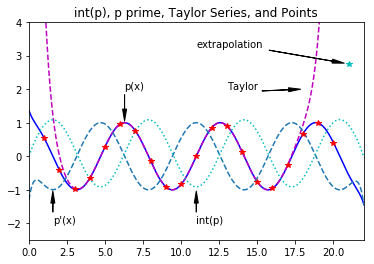

	runtime:  5.733318638918263  seconds


In [8]:
from math import factorial 
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos
import decimal
import time
import random

# this is to calculate runtime
startTime = time.clock()

# set context for decimal module
decimal.Context(prec = 30, rounding = 'ROUND_DOWN')
decimal.getcontext().prec = 30

# several different functions to define data points
def f(x):
    # This adds a Gaussian distribution to the data points 
    noise = random.gauss(1,0.2)
    # test against 4 differenet kinds of functions
    #f = sin(x)
    f = cos(x)
    #f = 3*sin(x) + np.log(x) + np.sqrt(x)
    #f = np.exp(x)
    #f = 3*x
    #f = np.log(x)
    # with noise
    #return noise * f
    # or without
    return f

# data points
# distance between each point
d = 1
# number of points
n = 20
# x and y arrays to hold data points
y = []
x = []
# there will be n data points
for i in range(1,n+1):
    # each x[i] = i*d, f(x[i]) = f(i*d)
    y.append(f(i*d))
    #x.append(i)
    x.append(d*i)

'''This is to compare the Talor series with the Lagrange polynomial.
The assumption is that a Taylor series centered around the middle data
point is roughly equal to the Lagrange polynomial. For a Taylor series
of cos not centered at zero, the derivatives are required for each
term. Instead of calculating derivatives for each term, two summations
were created incorperating sin and cos. '''
def cosExpansion(x,a):
    total = 0
    terms = n
    # cos terms, or even terms
    for k in range(int(terms/2)):
        numerator = (-1)**k * cos(a) * (x-a)**(2*k)
        denominator = factorial(2*k)
        total += (numerator / denominator)
    # sin terms, or odd terms
    for k in range(1,int(terms/2)+1):
        numerator = (-1)**k * sin(a) * (x-a)**(2*k-1)
        denominator = factorial(2*k-1)
        total += (numerator / denominator)
    return total


# This is used in several functions. It comes up frequently 
# because of how the matrix system was solved. 
def nChoosek(n,k):
    # factorials of negative numbers do not exist
    if n < k:
        # for our purposes, it is convenient to define them as zero
        return 0
    else:
        # binomial coefficient formula 
        return factorial(n)/(factorial(n-k)*factorial(k))

# Elements of the reduced upper triangular matrix
def Mij(i,j):
    summation = 0
    for k in range(0,i):
        summation += nChoosek(i-1,k)*pow((k+1)*d,j-1)*pow(-1,i-k-1)
    return int(summation)

# Creates the upper triangular matrix
def upperMatrix(n,d):
    row = range(1,n+1)
    col = range(1,n+1)
    tempRow = []
    tempArr = []
    for i in col:
        for j in row:
            tempRow.append(Mij(i,j))
        tempArr.append(tempRow)
        tempRow = []
    return np.matrix(tempArr)

# Elements of the y column after row reduction is performed
def Bi(i):
    summation = 0
    for k in range(0,i):
        summation += nChoosek(i-1,k)*y[k]*pow(-1,i-k-1)   
    return summation

# Create a matrix system, so that each matrix element is 
# only computed once. 
M = upperMatrix(n,d)
B = []
for i in range(1,n+1):
    B.append(Bi(i))

'''This creates a matrix containing Pascal's triangle with negative 
diagonals. It appears in the formula because of the binomial 
expansion coefficients created from row reduction.  '''
def pascal(numberOfPoints):
    # create array of zeros
    P = np.zeros([numberOfPoints,numberOfPoints])
    # first row is all ones 
    P[0][:] = 1
    # diagonal is all ones
    for i in range(numberOfPoints):
        P[i][i] = 1
    # This makes the triangle 
    for row in range(numberOfPoints-1):
        for col in range(numberOfPoints-1):
            # by taking the two elements above it
            r = row + 1
            c = col + 1
            # and adding them together. 
            P[r][c] = P[r][c-1] + P[r-1][c-1]
    # Now make every other diagonal negative
    for row in range(numberOfPoints):
        for col in range(numberOfPoints):
            r = row
            c = col
            P[r][c] *= (-1)**(col+row)
    # return a matrix
    P = np.matrix(P)
    return P


'''This function returns an array of all the possible 
permutations of decreasing, non-equal, numbers in a given 
range. This list will be used to select certain matrix elements 
later on. The length of the decreasing sequence is given by 
the number of matrix indexes that need to be swapped.''' 
def swapIndexes(numberOfSwaps, start, stop):
    # This function should return a predetermined amount of 
    # permutations. 
    possiblePermutations = nChoosek(stop-start-1,numberOfSwaps)
    
    # create a list of indexes
    indexes = []
    for i in range(numberOfSwaps):
        indexes.append(stop - i - 1)
    
    # current index = last  
    currentIndex = (numberOfSwaps-1)
    
    # this is what the function will return 
    allPermutations = []
    # add the initial permutation to the list
    '''Deep copy was necessary to make a brand new list, that was 
    not effected by operations on the previous list, and vice versa.'''
    i = deepcopy(indexes)
    allPermutations.append(i)
    # create all the correct subscript permutations
    while possiblePermutations > 0:
        # if at the last element
        if currentIndex == numberOfSwaps - 1:
            # and it's greater than two
            if indexes[currentIndex] > start+1:
                # decrement the value
                indexes[currentIndex] -= 1
                # and tally off one permutation 
                possiblePermutations -= 1
                # and add it to the list
                i = deepcopy(indexes)
                allPermutations.append(i)
            # otherwise, if it is two already  
            elif indexes[currentIndex] == start+1:
                # and there's only one swap
                if currentIndex == 0:
                    # we are done!
                    break
                # otherwise
                else:
                    # move to previous number 
                    currentIndex -= 1
            # just in case something squirly happens...
            else:
                print('value: ', indexes[currentIndex])
                print('current: ', currentIndex)
                print('start: ', start)
                print('swapIndexes ERROR')
                print(indexes[currentIndex])
                break
        # if back to the 1st element
        elif currentIndex == 0:
            # and it's greater than two
            if indexes[currentIndex] > indexes[currentIndex+1]+1:
                # decrement the value
                indexes[currentIndex] -= 1
                # and tally off one permutation
                possiblePermutations -= 1
                # make all the trailing numbers 
                # n, n-1, n-2, ...
                for i in range(1,numberOfSwaps):
                    # each element is one less than previous 
                    indexes[i] = indexes[i-1] - 1
                # and return to last element to start over
                currentIndex = numberOfSwaps - 1 
                # add the permutation to the list
                i = deepcopy(indexes)
                allPermutations.append(i)
            # and it is at its lowest value
            else:
                # we're done! 
                possiblePermutations = 0
        # or if somewhere in the middle, 
        else:
            # and greater than the next element + 1
            if indexes[currentIndex] > indexes[currentIndex+1]+1:
                # decrement the value
                indexes[currentIndex] -= 1
                # and tally off a permutation
                possiblePermutations -= 1
                # fix trailing numbers
                for i in range(currentIndex + 1,numberOfSwaps):
                    # each element is one less than previous 
                    indexes[i] = indexes[i-1] - 1
                # and return to last element
                currentIndex = numberOfSwaps - 1
                # add the permutation to the list
                i = deepcopy(indexes)
                allPermutations.append(i)
            # and value cannot be decremented
            else:
                # move to previous element
                currentIndex -= 1
    # return the entire list of subscripts
    return allPermutations
    
''' Now the array of indexes from swapIndexes is used to select 
matrix elements from Mij. Each element in the array represents a 
sequence of swaps performed on matrix elements. After the swaps 
are performed, the sequence represents a set of matrix elements 
that are to be multiplied together. This next function, returns 
the sum of all multiplied matrix elements for each given number
of swaps. '''
def permutationSwapper(numberOfSwaps, start, stop):
    # this situation does come up, and will always equal 1
    if start == stop:
        return 1
    # create the matrix subscripts
    matrixSubscripts = []
    for j in range(start,stop):
        matrixSubscripts.append([j,j+1])
    # in each term, we'll need one product with zero swaps
    if numberOfSwaps == 0:
        # define a product
        product = 1
        # duplicate list of subscripts
        copy = deepcopy(matrixSubscripts)
        for element in range(len(copy)):
            product *= M.item(copy[element][0]-1,copy[element][1]-1)
        return product
    # get the swap positions 
    allPermutations = swapIndexes(numberOfSwaps, start, stop)
    # each product of matrix elements will be added to this
    summation = 0
    # use the permutations to perform swaps on the subscripts
    for eachPermutationSet in range(len(allPermutations)):
        # create a copy of the subscripts
        copy = deepcopy(matrixSubscripts)
        for eachSwap in range(numberOfSwaps):
            # designate the postion of the swap
            pos = allPermutations[eachPermutationSet][eachSwap]-start
            # perform the swap
            copy[pos-1][1],copy[pos][1] = copy[pos][1],copy[pos-1][1]
        # reset product to 1
        product = 1
        # Take all the subscripts
        for element in range(len(copy)):
            # and map them to matrix elements,
            # multiply them together
            product *= M.item(copy[element][0]-1,copy[element][1]-1)
        # and add the product to the sum
        summation += product 
    # finally, return the sum
    return summation


'''Now we sum together all the possible swaps and divide. The 
following function was listed in the write up, and Power Point as
Rij, or ratios. These are the stored elements of the matrix file. '''
def ratio(start, stop):
    # the first term is always one
    if start == stop:
        return (1/M.item(start-1,start-1))
    # this will add alternating terms in the numerator
    numerator = 0
    for swaps in range(stop-start):
        numerator += ((-1)**(swaps+stop-start)) * permutationSwapper(swaps,start,stop)
        
    # create a denominator
    denominator = 1
    for element in range(start-1, stop):
        denominator *= M.item(element,element)
    
    #return numerator
    '''As the exponents get larger, or statistical error is 
    introduced, higher accuracy is necessary to create a suitable fit.
    In an effort to accomplish that, the decimal module was called. 
    Although the decimals can now be calculated to an arbitrary 
    accuracy, the matrix file will only hold numbers of a maximum size.
    more work will need to be done to alleviate this. '''
    return decimal.Decimal(numerator)/decimal.Decimal(denominator)
    #return (numerator / denominator)
    #return denominator

# This function creates a matrix to store all ratios for future use.
def createRatioMatrix(size):
    # create an n x n array of zeros 
    matrix = np.zeros((size,size))
    # page through each row..
    for r in range(size):
        # ... and column
        for c in range(size):
            # to create and upper triangular matrix
            if r <= c:
                # poplulate elements with the ratio function
                matrix[r][c] = ratio(r+1,c+1)
    # retrun the matrix
    return matrix
        
''' This creates the term matrix, and only needs doing once.
Creating a ratio matrix of 25 x 25 took a runtime of 
5 hours, 38 minutes and 17.7 seconds. '''
#####     ratioMatrix = createRatioMatrix(n)

''' Some of these calculations are very lengthy, so 
it pays to keep track of how long they take. After 20 data 
points, the run times are longer than one hour, and rapidly 
go up from there. '''
def runtime():
    # startTime was initiated at the beginning of the program
    t = time.clock() - startTime
    hours = t // (60*60)
    minutes = t // 60
    seconds = t % 60
    # dispaly runtime
    print('\truntime: ', seconds,' seconds')


'''The following two functions read and write matrixes to 
a file. Calculating the matrix elements requires hefty runtime, 
and they need only be calculated once, as these figures do not
depend on the data points at all. Once calculated, the matrixes
can be called very quickly from a text file. '''
def writeMatrix(matrix, matrixFile):
    # open the file 
    f = open(matrixFile, 'w')
    # page through rows
    for row in range(len(matrix)):
        # create an empty string to add onto
        line = ''
        # and columns 
        for col in range(len(matrix[row])):
            # add each matrix element to the string
            line += str(matrix[row][col])
            # separate by a comma, so the matrix can be read easily
            line += ','
        # write the string to the file
        f.write(line)
        # separate the rows by newline escapes sequences 
        f.write('\n')
    # close the file. 
    f.close()
    
# Write the matrix to a file. This only needs to be done once
#####     writeMatrix(termMatrix, 'RatioMatrix.txt')
   
# Retrieve the stored matrix from the file 
def readMatrix(rows, matrixFile):
    # open the file
    f = open(matrixFile, 'r')
    # create an emtpy list
    matrix = []
    # page through lines in the file to create 
    for row in range(rows):
    #for row in f:
        # rows in the matrix
        r = f.readline()
        # turn the file string into a list by splitting at the ,'s
        r = r.split(',')
        # remove the '\n' from the end of the list
        r.pop()
        # convert each element in the list to float
        for i in range(len(r)):
            r[i] = float(r[i])
        # add each row list to the matrix list
        matrix.append(r)
    # turn the array into a numpy matrix
    matrix = np.matrix(matrix)
    # close the file 
    f.close()
    # and return the stored matrix 
    return matrix

# Computes each Lagrange coefficient my multiplying truncated matrixes
def pCoefficient(i,p,matrix):
    # for indexing reasons, 
    i -= 1
    # row vector of y value
    yVector = np.matrix(y)[:,0:len(matrix)]
    ''' This part is the essence of the algorithm. 
    Each coefficient can be computed by simply multiplying 
    a predifined, one-size-fits-all matrix by the y values.'''
    matrix = np.matrix(matrix)
    # formula can be found in write up as well
    return float(yVector * p[:,i:n] * matrix.getT()[i:,i])
    
# store each coefficient in an array
def createCoefficientArray(numberOfPoints, ratioMatrix):
    # negate every other row, so that the 1st term is always positive
    for i in range(numberOfPoints):
        ratioMatrix[i] *= (-1)**(2*numberOfPoints)
    # create a Pascal matrix for computing coefficients
    p = pascal(numberOfPoints)
    # list for storing calculated coefficients
    coefficients = []
    # append each coefficient to the list
    for i in range(1,numberOfPoints+1):
        coefficients.append(pCoefficient(i,p,ratioMatrix))
    # return the list
    return coefficients


''' This is a cascading algorithm for computing p values.
It multiplies, then adds, to prevent the exponential terms
from getting too large. The end result of any fit is going to 
be on the same order as the function value. However, higher order
terms in series solutions tend to grow very large, and are prone
to computational error. 

p = a1 + a2*x + a3*x^2 + a4*x^3 + a5*x^4

We already know that these huge terms will cancel eachother out 
to a great degree, so splitting up the exponent can keep the numbers 
within a managable range. 

  = a1 + {a2 + [a3 + (a4 + a5*x)*x]*x}*x '''
def cascade(x, coefficients):
    # start with last coefficient
    m = len(coefficients)
    p = coefficients[m-1]
    # loop m-1 times
    for i in range(m-1):
        # multiply
        p *= x
        # then add
        p += coefficients[m-i-2]
        # and repeat
    # return p value
    return p

'''
# Power rule derivative of power series
def firstDerivative(x, coefficients):
    p = 0
    # the first coefficient drops off
    for i in range(1, n):
        p += i*coefficients[i] * x**(i-1)
        p = float(p)
    return p'''

'''Because this is a power series, any derivative can easily 
be computed by applying a simple power rule. '''
def derivative(x, coefficients,j):
    # initial power series 
    p = 0
    for i in range(j,n):
        # generalized power rule 
        r = factorial(i)/factorial(i-j)
        # add to the power series 
        p += r * coefficients[i] * x**(i-j)
    # If derivative number exceeds polynomial order, 
    if j >= n:
        # all terms drop off.
        return 0
    return p

# Once again, apply power rule, but this time for 1st integral
def integral(x, coefficients):
    # initial power series
    p = 0
    # the first coefficient drops off
    for i in range(n):
        # power series summation
        p += (1/(i+1)) * coefficients[i] * x**(i+1)
        p = float(p)
    return p

# Creates, fits, and plots all functions. 
def display(numberOfPoints):
    # midpoint
    m = (n*d)/2
    # arrays for the Lagrange, Taylor, integral and derivatives
    pfit,tfit,intP,dpdx,dpdx4,dpdx8,dpdx12,dpdx16 = [],[],[],[],[],[],[],[]
    # read in the matrix
    ratios = readMatrix(numberOfPoints,'RatioMatrix.txt')[:numberOfPoints,:numberOfPoints]
    # now create the coefficients
    coefficients = createCoefficientArray(numberOfPoints,ratios)
    # this is the x axis of the fit plot
    xRange = np.arange(m-20,m+20,0.01)
    #xRange = np.arange(-1,n+20,0.01)
    # populate y values for pfit
    for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        pfit.append(cascade((1/d)*xRange[i],coefficients))
     
    # populate y values for derivatives 
    for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        dpdx.append(derivative((1/d)*xRange[i],coefficients,1))
    '''for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        dpdx8.append(derivative((1/d)*xRange[i],coefficients,8))
    for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        dpdx12.append(derivative((1/d)*xRange[i],coefficients,12))
    for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        dpdx16.append(derivative((1/d)*xRange[i],coefficients,16))'''
       
    # populate y values for integral
    for i in range(len(xRange)):
        #pfit.append(cascade(xRange[i],coefficients))
        intP.append(integral((1/d)*xRange[i],coefficients))
        
    # populate y values for tfit
    for i in range(len(xRange)):
        tfit.append(cosExpansion(xRange[i],(n*d)/2))
        
    # plot of fit
    plt.plot(xRange,pfit,'b')
    # taylor series
    plt.plot(xRange,tfit,'m--')
    # derivatives
    plt.plot(xRange,dpdx,'--')
    '''plt.plot(xRange,dpdx8,'--')
    plt.plot(xRange,dpdx12,'-.')
    plt.plot(xRange,dpdx16, ':')'''
    # integral 
    plt.plot(xRange,intP,'c:')
    
    # Plot the points
    plt.plot(x,y,'r*')
    # add pretty arrows to explain stuff 
    plt.title('int(p), p prime, Taylor Series, and Points')
    plt.annotate('p(x)', xy=(2*np.pi, 1), xytext=(2*np.pi, 2), arrowprops=dict(facecolor='black', shrink=0.05,width = 0.1, headwidth = 4))
    plt.annotate('p\'(x)', xy=(np.pi/2, -1), xytext=(np.pi/2, -2), arrowprops=dict(facecolor='black', shrink=0.05,width = 0.1, headwidth = 4))
    plt.annotate('Taylor', xy=(18, 2), xytext=(13, 2), arrowprops=dict(facecolor='black', shrink=0.05,width = 0.1, headwidth = 4))
    plt.annotate('int(p)', xy=(7*np.pi/2, -1), xytext=(7*np.pi/2, -2), arrowprops=dict(facecolor='black', shrink=0.05,width = 0.1, headwidth = 4))
    plt.xlim(min(x)-1,max(x)+2)
    plt.ylim(min(y)-1.5,max(y)+3)
    plt.show()


'''This function will input a ratio matrix, and calculate
the difference between |p(x[i])-y[i]| for each known data point.'''
def minimizationFunction(matrix,testPoint,numberOfPoints):
    # make expanded ratio matrix, with new test point
    for component in range(1,len(testPoint)+1):
        matrix[component][-1] = testPoint[component-1]
    # compute coefficients
    coefficients = createCoefficientArray(numberOfPoints, matrix)
    # loop through each data point
    error = 0
    for dataPoint in range(numberOfPoints):
        # calculate difference |p(x[i])-y[i]|
        a = y[dataPoint]
        b = cascade(d*(dataPoint+1), coefficients)
        error += abs(a - b)
    return error
    
'''This function is a proof of concept, that a monte carlo algorithm
can in fact be used to expand the ratio matrix by another column. 
The runtime however, is actually much longer than calculating the 
ratios directly. Perhaps, a new, smarter optimization algorithm could
be employed here. Ultimately, the real problem here, is that each 
point adds another dimension to the optimization. That is, an n 
dimensional matrix will require a n-2 dimensional optimization, because
the top row and diagonal are already known. '''
def monteCarlo(existing):
    print('This might take a while. ')
    # expand the matrix by one column and row
    newSize = existing + 1
    
    # create a copy of the term matrix, but with a new row and column
    monteCarloMatrix = np.zeros((newSize,newSize))
    monteCarloMatrix = np.array(monteCarloMatrix)
    
    # read in the partially computed ratio matrix
    partialMatrix = readMatrix(existing,'RatioMatrix.txt')[:existing,:existing]
    # go through each element of the ratio matrix and copy it
    for row in range(existing):
        for col in range(existing):
            monteCarloMatrix[row][col] = partialMatrix.item(row,col)
     
    # the top row is always +1 or -1
    monteCarloMatrix[0][-1] = (-1)**(2*newSize)
    
    # the bottom right element will always be 1/M(n+1,n+1)
    monteCarloMatrix[-1][-1] = 1/Mij(newSize,newSize)
    
    # create an n-tuple point to center the initial search on 
    center = []
    for row in range(1,newSize-1):
        center.append(monteCarloMatrix[row][-2])
        
    #center = [-2.08,1.458,-0.4166]
    # initial search radius
    radius = 100
    # to make sure the loop does not execute forever
    counter = 0
    # set an initial tolerance
    error = 100
    # how accurate the result will be
    tolerance = 0.1
    # each time the loop will test a predefined number of points
    numberOfPoints = 20
    # this loop will execute until the point converges 
    while(abs(error) > tolerance):
        # create an array to store the test points
        testPointArray = []
        # make numberOfPoints random points
        for points in range(numberOfPoints):
            # each point will be a tuple of size n
            point = []
            for components in range(len(center)):
                # choose a random value within the radius of the center
                component = random.uniform(center[components]-radius,center[components]+radius)
                # add the value to the point
                point.append(component)
            # add the point to the array
            testPointArray.append(point)
            
        # test each point 
        for point in range(numberOfPoints):
            #print(error, radius)
            newError = minimizationFunction(monteCarloMatrix,testPointArray[point],newSize)
            #oldError = minimizationFunction(monteCarloMatrix,center,newSize)
            #print('error: ', error, 'radius: ', radius)
            # compare error 
            if newError < error:
                #print(newError,radius)
                error = newError
                center = testPointArray[point]
            # if the radius gets too small without converging, 
            if radius < tolerance:
                #radius = 2*newSize*error
                radius = error
        # reduce the search radius 
        #radius = radius / 2
        #radius = newSize*error
        radius *= 0.9
                
        # failsafe
        counter += 1
        if counter > 100000:
            break
    # display results
    print('finding the right column with Monte Carlo method')
    print('radius: ' , radius)
    print('error: ' , error)
    print('number of loops: ', counter)
    print(monteCarloMatrix)
    
'''The last function computes an estimate for an unknown y value at 
the last interval. The explanation behind this algorithm is somewhat
lengthy, and is included in the presentation write up.  '''
def extrapolation():
    # create the ratio vector
    ratioVector = readMatrix(n+1,'RatioMatrix.txt')[0,0:n+1]
    ratioVector = np.matrix(ratioVector)
    ratioVector = ratioVector.getT()
    # create truncated Pascal
    P = pascal(n+1)[0:-1,:]
    # set up y vector
    yVector = np.matrix(y)
    # pfit of known values
    matrix = readMatrix(n, 'RatioMatrix.txt')[0:n,0:n]
    coefficients = createCoefficientArray(n,matrix)
    # midpoint
    m = n*d / 2
    # compute yn
    truncated = yVector*P*ratioVector
    pfit = cascade(m,coefficients)
    yNext = (-1)**(n+1)*(pfit-truncated)
    xNext = (n+1)*d
    plt.plot(xNext,yNext,'c*')
    # arrow annotation
    plt.annotate('extrapolation', xy=(xNext,yNext), xytext=(xNext-10,yNext+0.5), arrowprops=dict(facecolor='black', shrink=0.05,width = 0.1, headwidth = 4))
    
extrapolation()

# run this if you like. It works, but it takes a really long time.
#monteCarlo(4)
display(n)

runtime()




